# Use the SIMDNA package to generate random genotypes form an empricial distribution

### Load in SIMDNA and other necessary packages and test to see if they work

In [1]:
"simDNAmixtures" %in% rownames(installed.packages())

[1] TRUE

In [2]:
system('ls /Library/Frameworks/R.framework/Versions/4.5-x86_64/Resources/library/simDNAmixtures/extdata | grep .csv', intern=TRUE)

[1] "Example_2p_Parameter_Summary.csv"        
 [2] "Example_References_DB.csv"               
 [3] "FBI_extended_Cauc_022024.csv"            
 [4] "GlobalFiler_SizeRegression.csv"          
 [5] "GlobalFiler_Stutter_Exceptions_3500.csv" 
 [6] "Kintelligence_1000G_AFR.csv"             
 [7] "Kintelligence_1000G_AMR.csv"             
 [8] "Kintelligence_1000G_EAS.csv"             
 [9] "Kintelligence_1000G_EUR.csv"             
[10] "Kintelligence_1000G_SAS.csv"             
[11] "Kintelligence_Linkage_Map.csv"           
[12] "YFiler_Plus_B1RP1_Stutter_regression.csv"
[13] "YFiler_Plus_B1RP2_Stutter_regression.csv"
[14] "YFiler_Plus_B1RP3_Stutter_regression.csv"
[15] "YFiler_Plus_B1R_Stutter_regression.csv"  
[16] "YFiler_Plus_B2RP1_Stutter_regression.csv"
[17] "YFiler_Plus_B2RP2_Stutter_regression.csv"
[18] "YFiler_Plus_B2RP3_Stutter_regression.csv"
[19] "YFiler_Plus_B2RP4_Stutter_regression.csv"
[20] "YFiler_Plus_B2R_Stutter_regression.csv"  
[21] "YFiler_Plus_B3R_Stutter_regression.csv"  
[22] "YFiler_Plus_F0RP2_Stutter_regression.csv"
[23] "YFiler_Plus_F0RP3_Stutter_regression.csv"
[24] "YFiler_Plus_F1RP2_Stutter_regression.csv"
[25] "YFiler_Plus_F1R_Stutter_regression.csv"  
[26] "YFiler_Plus_F2R_Stutter_regression.csv"  
[27] "YFiler_Plus_SizeRegression.csv"

In [3]:
# Load packages
library(simDNAmixtures)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
# Load example allele frequency file that comes with the package
allele_freqs_file <- system.file("extdata","FBI_extended_Cauc_022024.csv",
                                       package = "simDNAmixtures")

In [5]:
print(allele_freqs_file)

[1] "/Library/Frameworks/R.framework/Versions/4.5-x86_64/Resources/library/simDNAmixtures/extdata/FBI_extended_Cauc_022024.csv"


In [6]:
# Read allele frequencies to create an empirical distribution
allele_freqs <- read_allele_freqs(allele_freqs_file)

# Not too sure what the point of this is
# seems to be a configuration for a specific kit
gf <- gf_configuration()

# When sampling a genotype, what kind of EPG do we want?
# We can randomzie the template ratio, as well as the degradation
sampling_parameters <- list(min_template = c(50., 10000.), max_template = c(50., 10000.),
                            degradation_shape = 2.5, degradation_scale = 1e-3)

## Create a mixture of random sampled genotypes

In [7]:
set.seed(1)

# With this method, we assume that all heights above 75 are true alleles, and those below are false.
# That means we can expect artefacts to be included in the genotypes.
# This is not good enough, but serves as a starting point.
# Bonus with this approach: AMEL (sex) peaks are already included
mixtures <- sample_mixtures(
  n = 2,
  contributors = c("U1", "U2"),
  freqs = allele_freqs,
  sampling_parameters = sampling_parameters,
    # model sets a threshold (usually 75) per locus, essentially creating an analytical threshold. 
    # Should we want that? I think not, because we need to know the underlying genotype, aka ground truth
  model_settings = gf$log_normal_settings,
  sample_model = sample_log_normal_model,
)

In [8]:
mixtures

$call
sample_mixtures(n = 2, contributors = c("U1", "U2"), freqs = allele_freqs, 
    sampling_parameters = sampling_parameters, model_settings = gf$log_normal_settings, 
    sample_model = sample_log_normal_model)

$samples
$samples$sample_0001_N2_50_10000_bc
$samples$sample_0001_N2_50_10000_bc$sample_name
[1] "sample_0001_N2_50_10000_bc"

$samples$sample_0001_N2_50_10000_bc$contributor_genotypes
$samples$sample_0001_N2_50_10000_bc$contributor_genotypes$U1
   Sample Name    Locus Allele1 Allele2
1           U1  D3S1358      15      15
2           U1      vWA      14      18
3           U1  D16S539      13      13
4           U1   CSF1PO      10      11
5           U1     TPOX       8      12
6           U1     AMEL       X       X
7           U1  D8S1179      10      10
8           U1   D21S11    31.2    32.2
9           U1   D18S51      12      14
10          U1   D2S441      10      10
11          U1  D19S433      14      14
12          U1     TH01       8     9.3
13          U1    

In [9]:
mixtures$samples[[1]]$annotated_mixture[5:6]
knitr::kable(mixtures$parameter_summary)
mixtures$sample[[1]]$contributor_genotype

Height,Expected
<dbl>,<dbl>
19,38.2271814
447,508.9258028
7563,8364.7473056
6499,7644.2890711
209,34.8866519
0,0.1568395
9,5.6077240
143,38.1339698
1,0.7613843




|SampleName                 |contributors1 |contributors2 |model            | template1| template2| degradation1| degradation2|       c2| k2BackStutter| k2ForwardStutter| k22bpBackStutter| k2DoubleBackStutter|   D3S1358|      vWA|   D16S539|    CSF1PO|      TPOX|      AMEL|   D8S1179|    D21S11|    D18S51|    D2S441|   D19S433|     TH01|       FGA| D22S1045|   D5S818|  D13S317|   D7S820|      SE33| D10S1248|  D1S1656|   D12S391|   D2S1338|
|:--------------------------|:-------------|:-------------|:----------------|---------:|---------:|------------:|------------:|--------:|-------------:|----------------:|----------------:|-------------------:|---------:|--------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|--------:|---------:|--------:|--------:|--------:|--------:|---------:|--------:|--------:|---------:|---------:|
|sample_0001_N2_50_10000_bc |U1            |U2            |log_normal_model |        50|     10000|    0.00320

Sample Name,Locus,Allele1,Allele2
<chr>,<chr>,<chr>,<chr>
U1,D3S1358,15,15
U1,vWA,14,18
U1,D16S539,13,13
U1,CSF1PO,10,11
U1,TPOX,8,12
U1,AMEL,X,X
U1,D8S1179,10,10
U1,D21S11,31.2,32.2
U1,D18S51,12,14


In [10]:
write.csv(mixtures$parameter_summary, "parameter_summary.csv", row.names = FALSE)

In [11]:
# combines all samples in to one list, and to differentiate samples, adds a column
# mixtures$smash
mixtures$samples[[1]]$mixture

Locus,Allele,Height,Size
<chr>,<chr>,<int>,<dbl>
D3S1358,14,447,117.33
D3S1358,15,7563,121.40
D3S1358,16,6499,125.48
D3S1358,17,209,129.56
vWA,14,143,168.84
vWA,17,592,180.95
vWA,18,7567,184.99
vWA,19,5532,189.02
D16S539,8,277,239.58


In [12]:
knitr::kable(mixtures$parameter_summary[1:6])



|SampleName                 |contributors1 |contributors2 |model            | template1| template2|
|:--------------------------|:-------------|:-------------|:----------------|---------:|---------:|
|sample_0001_N2_50_10000_bc |U1            |U2            |log_normal_model |        50|     10000|
|sample_0002_N2_50_10000_bb |U1            |U2            |log_normal_model |        50|     10000|

In [13]:
# Contains the data of the alleles
sim_peaks <- mixtures$samples[[1]]$mixture
# sim_peaks
knitr::kable(head(sim_peaks, 10))



|Locus   |Allele | Height|   Size|
|:-------|:------|------:|------:|
|D3S1358 |14     |    447| 117.33|
|D3S1358 |15     |   7563| 121.40|
|D3S1358 |16     |   6499| 125.48|
|D3S1358 |17     |    209| 129.56|
|vWA     |14     |    143| 168.84|
|vWA     |17     |    592| 180.95|
|vWA     |18     |   7567| 184.99|
|vWA     |19     |   5532| 189.02|
|D16S539 |8      |    277| 239.58|
|D16S539 |9      |   6966| 243.61|

In [14]:
# write.csv(mixtures$samples[[1]]$mixture, "mixture_peaks.csv", row.names = FALSE)

## Find the corresponding dyes for each marker in the globalfiler kit

In [15]:
# data(kits)

In [16]:
names(kits)

[1] "all_kits"                            "24plex_Panels_v4"                   
 [3] "ESSplex_Panels_v1"                   "ESSplex_Plus_Panels_v5"             
 [5] "ESSplex_SE_Plus_Panels_v4"           "ESSplex_SE_QS_v2"                   
 [7] "ForenSeqUAS"                         "GlobalFiler_Panel_v1"               
 [9] "Identifiler_Plus_Panels_v1X"         "NGM_Detect_Panel_v2.1"              
[11] "NGM_panel_v1X"                       "NGMSElect_panel_v2X"                
[13] "PowerPlex_16_IDX_v2.0"               "PowerPlex_21_IDX_v2.0"              
[15] "PowerPlex_ESI_17_Fast_IDX_v1.1"      "PowerPlex_ESX_16_IDX_v1.0"          
[17] "PowerPlex_ESX_17_Fast_IDX_v1.1"      "PowerPlex_ESX_17_IDX_v2.0"          
[19] "PowerPlex_Fusion_6C_Panels_IDX_v1.1" "PowerPlex_Fusion_Panels_IDX_v1.0"   
[21] "SGM_Plus_v2"                         "VFP_Panels_v1"

In [17]:
dye_map <- kits$GlobalFiler[, c("Marker", "Color")]
dye_map <- dye_map %>%
  distinct(Marker, .keep_all = TRUE)

In [18]:
knitr::kable(head(dye_map, 20))



|Marker   |Color  |
|:--------|:------|
|D3S1358  |blue   |
|vWA      |blue   |
|D16S539  |blue   |
|CSF1PO   |blue   |
|TPOX     |blue   |
|Yindel   |green  |
|AMEL     |green  |
|D8S1179  |green  |
|D21S11   |green  |
|D18S51   |green  |
|DYS391   |green  |
|D2S441   |yellow |
|D19S433  |yellow |
|TH01     |yellow |
|FGA      |yellow |
|D22S1045 |red    |
|D5S818   |red    |
|D13S317  |red    |
|D7S820   |red    |
|SE33     |red    |

In [19]:
# Join the table of the peaks with the dye map
# This will add the color of the dye to the peaks
sim_peaks_with_dye <- left_join(sim_peaks, dye_map, by = c("Locus" = "Marker"))

In [20]:
knitr::kable(head(sim_peaks_with_dye, 21))



|Locus   |Allele | Height|   Size|Color |
|:-------|:------|------:|------:|:-----|
|D3S1358 |14     |    447| 117.33|blue  |
|D3S1358 |15     |   7563| 121.40|blue  |
|D3S1358 |16     |   6499| 125.48|blue  |
|D3S1358 |17     |    209| 129.56|blue  |
|vWA     |14     |    143| 168.84|blue  |
|vWA     |17     |    592| 180.95|blue  |
|vWA     |18     |   7567| 184.99|blue  |
|vWA     |19     |   5532| 189.02|blue  |
|D16S539 |8      |    277| 239.58|blue  |
|D16S539 |9      |   6966| 243.61|blue  |
|D16S539 |10     |   7004| 247.64|blue  |
|D16S539 |13     |    103| 259.73|blue  |
|CSF1PO  |10     |    127| 298.34|blue  |
|CSF1PO  |11     |   2230| 302.30|blue  |
|CSF1PO  |12     |   2018| 306.26|blue  |
|TPOX    |8      |   2399| 349.70|blue  |
|TPOX    |9      |   2295| 353.72|blue  |
|AMEL    |X      |  12722|  98.50|green |
|AMEL    |Y      |  11255| 104.50|green |
|D8S1179 |11     |    104| 139.06|green |
|D8S1179 |12     |    747| 143.16|green |

In [21]:
sim_peaks_with_dye

Locus,Allele,Height,Size,Color
<chr>,<chr>,<int>,<dbl>,<chr>
D3S1358,14,447,117.33,blue
D3S1358,15,7563,121.40,blue
D3S1358,16,6499,125.48,blue
D3S1358,17,209,129.56,blue
vWA,14,143,168.84,blue
vWA,17,592,180.95,blue
vWA,18,7567,184.99,blue
vWA,19,5532,189.02,blue
D16S539,8,277,239.58,blue


In [22]:
# add the ladder dye lane
# Define the fragment sizes
size_standard_sizes <- c(20, 40, 60, 80, 100, 114, 120, 140, 160, 180, 200, 214,
                         220, 240, 250, 260, 280, 300, 314, 320, 340, 360, 380,
                         400, 414, 420, 440, 460, 480, 500, 514, 520, 540, 560,
                         580, 600)

# Create a DataFrame for the size standard peaks
size_standard_df <- data.frame(
  Locus = "LIZ",
  Allele = NA,
  # Assign a consistent peak height; adjust later if randomness needed
  Height = 500,
  Size = size_standard_sizes,
  Color = "orange"
)

In [23]:
knitr::kable(head(size_standard_df, 11))



|Locus |Allele | Height| Size|Color  |
|:-----|:------|------:|----:|:------|
|LIZ   |NA     |    500|   20|orange |
|LIZ   |NA     |    500|   40|orange |
|LIZ   |NA     |    500|   60|orange |
|LIZ   |NA     |    500|   80|orange |
|LIZ   |NA     |    500|  100|orange |
|LIZ   |NA     |    500|  114|orange |
|LIZ   |NA     |    500|  120|orange |
|LIZ   |NA     |    500|  140|orange |
|LIZ   |NA     |    500|  160|orange |
|LIZ   |NA     |    500|  180|orange |
|LIZ   |NA     |    500|  200|orange |

In [24]:
# Combine with the existing simulated peaks DataFrame
combined_peaks_df <- rbind(sim_peaks_with_dye, size_standard_df)

# Add a column representing scan point, which is deduced using formula and current size
# The values of 11.2 and 3500 are the linear scaling factors that are hard coded from the paper
combined_peaks_df <- combined_peaks_df %>%
  mutate(Scan = round(Size * 11.2 + 3500))

In [25]:
knitr::kable(head(combined_peaks_df, 11))



|Locus   |Allele | Height|   Size|Color | Scan|
|:-------|:------|------:|------:|:-----|----:|
|D3S1358 |14     |    447| 117.33|blue  | 4814|
|D3S1358 |15     |   7563| 121.40|blue  | 4860|
|D3S1358 |16     |   6499| 125.48|blue  | 4905|
|D3S1358 |17     |    209| 129.56|blue  | 4951|
|vWA     |14     |    143| 168.84|blue  | 5391|
|vWA     |17     |    592| 180.95|blue  | 5527|
|vWA     |18     |   7567| 184.99|blue  | 5572|
|vWA     |19     |   5532| 189.02|blue  | 5617|
|D16S539 |8      |    277| 239.58|blue  | 6183|
|D16S539 |9      |   6966| 243.61|blue  | 6228|
|D16S539 |10     |   7004| 247.64|blue  | 6274|

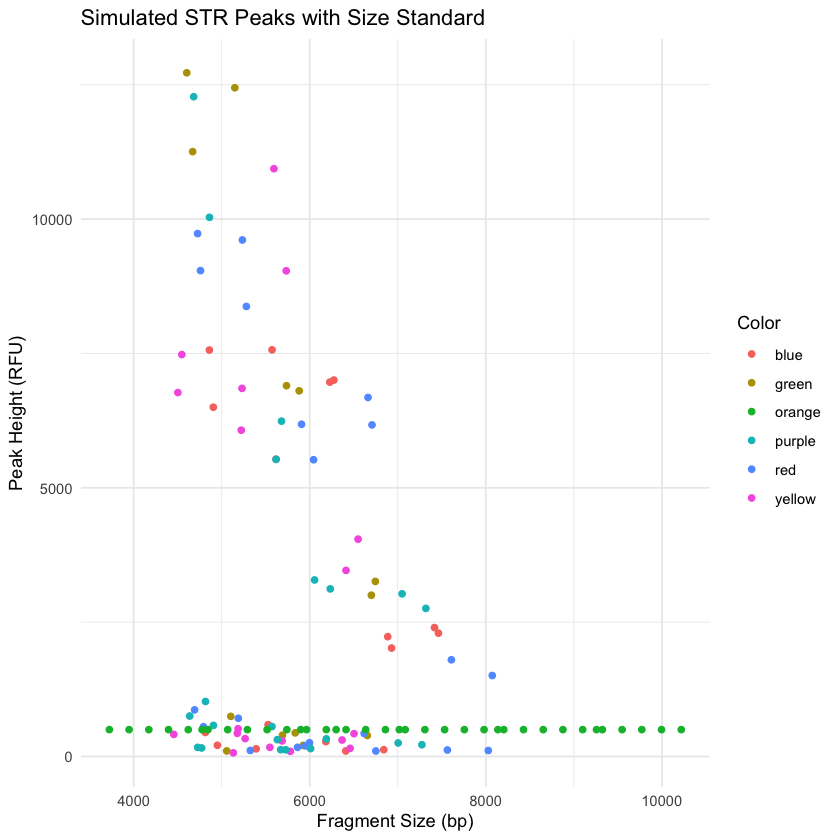

In [26]:
ggplot(combined_peaks_df, aes(x = Scan, y = Height, color = Color)) +
  geom_point() +
  labs(
    title = "Simulated STR Peaks with Size Standard",
    x = "Fragment Size (bp)",
    y = "Peak Height (RFU)"
  ) +
  theme_minimal()


In [27]:
write.csv(combined_peaks_df, "simulated_epg_with_dyes.csv", row.names = FALSE)

In [28]:
# dir.create("generated_alleles", showWarnings = FALSE)

# allele_freqs <- read_allele_freqs(allele_freqs_file)
# gf <- gf_configuration()

# dye_map <- kits$GlobalFiler[, c("Marker", "Color")]
# dye_map <- dye_map %>%
#   distinct(Marker, .keep_all = TRUE)

# size_standard_sizes <- c(20, 40, 60, 80, 100, 114, 120, 140, 160, 180, 200, 214,
#                          220, 240, 250, 260, 280, 300, 314, 320, 340, 360, 380,
#                          400, 414, 420, 440, 460, 480, 500, 514, 520, 540, 560,
#                          580, 600)

# # Create a DataFrame for the size standard peaks
# size_standard_df <- data.frame(
#   Locus = "LIZ",
#   Allele = NA,
#   # Assign a consistent peak height; adjust later if randomness needed
#   Height = 500,
#   Size = size_standard_sizes,
#   Color = "orange"
# )

for (i in 1:5) {
  set.seed(i)
  
  # Generate mixture
  mixtures <- sample_mixtures(
    n = 2,
    contributors = c("U1", "U2"),
    freqs = allele_freqs,
    sampling_parameters = sampling_parameters,
    model_settings = gf$log_normal_bwfw_settings,
    sample_model = sample_log_normal_model,
    results_directory = '.' # Don't write intermediate files
  )
  
  # Extract peaks
  sim_peaks <- mixtures$samples[[1]]$mixture
  
  # Join dye info
  sim_peaks_with_dye <- left_join(sim_peaks, dye_map, by = c("Locus" = "Marker"))
  
  # Add size standard
  combined_peaks_df <- rbind(sim_peaks_with_dye, size_standard_df)
  
  # Add scan column
  combined_peaks_df <- combined_peaks_df %>%
    mutate(Scan = round(Size * 11.2 + 3500))
  
  # Write to file
  out_file <- sprintf("generated_alleles/simulated_epg_with_dyes_seed_%d.csv", i)
  write.csv(combined_peaks_df, out_file, row.names = FALSE)
}

Finished sampling. Output written to ./2025-07-08 17_49_16 simulation 


Warning message in file(file, ifelse(append, "a", "w")):
"cannot open file 'generated_alleles/simulated_epg_with_dyes_seed_1.csv': No such file or directory"


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection
